In [74]:
# Importing Packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


##### Here,I have gathered the whole data and  change thier 'NOVEMBER','DECEMBER','JANUARY',FEBUARY columns name to 'MONTH DAYS' for concating the data of these four datasets.

In [2]:
dfN=pd.read_csv("E:\\datasets\\Sleep FitBit\\November Sleep Data - Sheet1.csv",skiprows=[1])

In [3]:
dfN=dfN.rename(columns={'NOVEMBER':'MONTH DAYS'})

In [4]:
dfD=pd.read_csv("E:\\datasets\\Sleep FitBit\\December Sleep data - Sheet1.csv",skiprows=[1])

In [5]:
dfD=dfD.rename(columns={'DECEMBER':'MONTH DAYS'})

In [6]:
dfJ=pd.read_csv("E:\\datasets\\Sleep FitBit\\January Sleep data - Sheet1.csv",skiprows=[1])

In [7]:
dfJ.shape

(31, 8)

In [8]:
dfJ=dfJ.rename(columns={'JANUARY':'MONTH DAYS','HEART RATE UNDER RESTING':'HEART RATE BELOW RESTING'})

In [9]:
dfF=pd.read_csv("E:\datasets\Sleep FitBit\February sleep data - Sheet1 (1).csv",skiprows=[1])

In [36]:
dfF=dfF.rename(columns={'FEBEUARY':'MONTH DAYS','SLEEP SQORE':'SLEEP SCORE'})

In [37]:
dfF

,MONTH DAYS,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,Wednesday,02/02/2022,90,7:27:00,20.00%,18.00%,88.00%,10:21pm - 6:50am
1,Thursday,02/03/2022,66,5:39:00,16.00%,0.00%,13.00%,11:00pm - 5:29am
2,Friday,02/04/2022,87,9:13:00,18.00%,19.00%,96.00%,11:09pm - 9:56am
3,Saturday,02/05/2022,85,6:50:00,23.00%,19.00%,93.00%,12:41am - 8:20am
4,Sunday,02/06/2022,78,6:43:00,17.00%,18.00%,70.00%,12:12am - 8:05am
5,Monday,02/07/2022,87,8:16:00,19.00%,15.00%,79.00%,10:33pm - 7:47am
6,Tuesday,02/08/2022,83,6:41:00,23.00%,15.00%,94.00%,12:12am - 7:52am
7,Wednesday,02/09/2022,81,7:18:00,21.00%,13.00%,89.00%,11:13pm - 7:45am
8,Thursday,02/10/2022,83,6:35:00,20.00%,21.00%,85.00%,10:24pm - 5:58am
9,Friday,02/11/2022,86,8:51:00,23.00%,21.00%,42.00%,9:49pm - 7:44am


In [38]:
dfD.columns

Index(['MONTH DAYS', 'DATE', 'SLEEP SCORE', 'HOURS OF SLEEP', 'REM SLEEP',
       'DEEP SLEEP', 'HEART RATE BELOW RESTING', 'SLEEP TIME'],
      dtype='object')

In [39]:
dfN.columns

Index(['MONTH DAYS', 'DATE', 'SLEEP SCORE', 'HOURS OF SLEEP', 'REM SLEEP',
       'DEEP SLEEP', 'HEART RATE BELOW RESTING', 'SLEEP TIME'],
      dtype='object')

In [40]:
dfJ.columns


Index(['MONTH DAYS', 'DATE', 'SLEEP SCORE', 'HOURS OF SLEEP', 'REM SLEEP',
       'DEEP SLEEP', 'HEART RATE BELOW RESTING', 'SLEEP TIME'],
      dtype='object')

In [41]:
dfF.columns

Index(['MONTH DAYS', 'DATE', 'SLEEP SCORE', 'HOURS OF SLEEP', 'REM SLEEP',
       'DEEP SLEEP', 'HEART RATE BELOW RESTING', 'SLEEP TIME'],
      dtype='object')

##### Now, I am going to cancat the whole data.

In [42]:
dfg=pd.concat([dfN,dfD,dfJ,dfF])
dfg.shape

(119, 8)

In [43]:
dfg

,MONTH DAYS,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,Monday,11/1/2021,88,8:06:00,20.00%,13.00%,84.00%,10:41pm - 7:54am
1,Tuesday,11/2/2021,83,7:57:00,12.00%,18.00%,90.00%,10:40pm - 7:55am
2,Wednesday,11/3/2021,81,7:06:00,13.00%,22.00%,93.00%,11:03pm - 7:16am
3,Thursday,11/4/2021,86,7:04:00,19.00%,17.00%,97.00%,10:55pm - 6:56am
4,Friday,11/5/2021,81,9:24:00,17.00%,15.00%,66.00%,10:14pm - 9:01am
...,...,...,...,...,...,...,...,...
22,Thursday,02/24/2022,84,7:18:00,19.00%,19.00%,96.00%,10:23pm - 6:43am
23,Friday,02/25/2022,90,7:46:00,20.00%,21.00%,98.00%,10:28pm - 7:15am
24,Saturday,02/26/2022,82,8:02:00,16.00%,16.00%,57.00%,11:05pm - 8:10am
25,Sunday,02/27/2022,85,8:54:00,18.00%,17.00%,81.00%,9:59pm - 8:11am


In [ ]:
# Here,i am removing '%' from REM SLEEP and converting it into float type.
dfg['REM SLEEP']=dfg['REM SLEEP'].apply(lambda x:x.replace('%',''))

In [44]:

dfg['REM SLEEP']=dfg['REM SLEEP'].astype(float)

In [45]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MONTH DAYS                119 non-null    object 
 1   DATE                      119 non-null    object 
 2   SLEEP SCORE               119 non-null    int64  
 3   HOURS OF SLEEP            119 non-null    object 
 4   REM SLEEP                 119 non-null    float64
 5   DEEP SLEEP                119 non-null    object 
 6   HEART RATE BELOW RESTING  119 non-null    object 
 7   SLEEP TIME                119 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.4+ KB


In [64]:
# Here,i am removing '%' from DEEP SLEEP and converting it into float type.
dfg['DEEP SLEEP']=dfg['DEEP SLEEP'].apply(lambda x:x.replace('%',''))

AttributeError: 'float' object has no attribute 'replace'

In [65]:

dfg['DEEP SLEEP']=dfg['DEEP SLEEP'].astype(float)

In [66]:
# Here,i am removing '%' from HEART RATE BELOW RESTING and converting it into float type.
dfg['HEART RATE BELOW RESTING']=dfg['HEART RATE BELOW RESTING'].apply(lambda x:x.replace('%',''))

AttributeError: 'float' object has no attribute 'replace'

In [47]:

dfg['HEART RATE BELOW RESTING']=dfg['HEART RATE BELOW RESTING'].astype(float)

<AxesSubplot:>

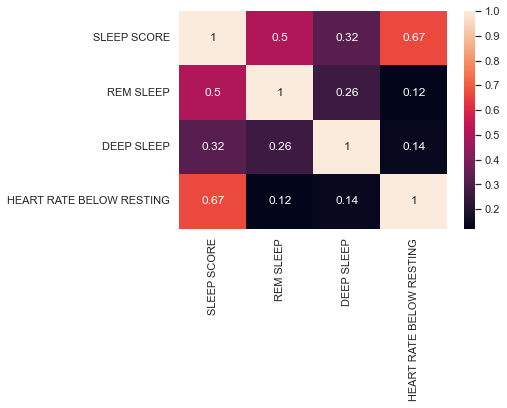

In [48]:
sns.heatmap(dfg.corr(),annot=True)

##### Now,i am preparing data for machine learning prediction model for predicting Sleep Score

In [49]:
dfg=dfg.drop(columns=['MONTH DAYS', 'DATE','HOURS OF SLEEP','SLEEP TIME'])

In [50]:
dfg

,SLEEP SCORE,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING
0,88,20.0,13.0,84.0
1,83,12.0,18.0,90.0
2,81,13.0,22.0,93.0
3,86,19.0,17.0,97.0
4,81,17.0,15.0,66.0
...,...,...,...,...
22,84,19.0,19.0,96.0
23,90,20.0,21.0,98.0
24,82,16.0,16.0,57.0
25,85,18.0,17.0,81.0


##### Here,we are checking the normality of each and every features

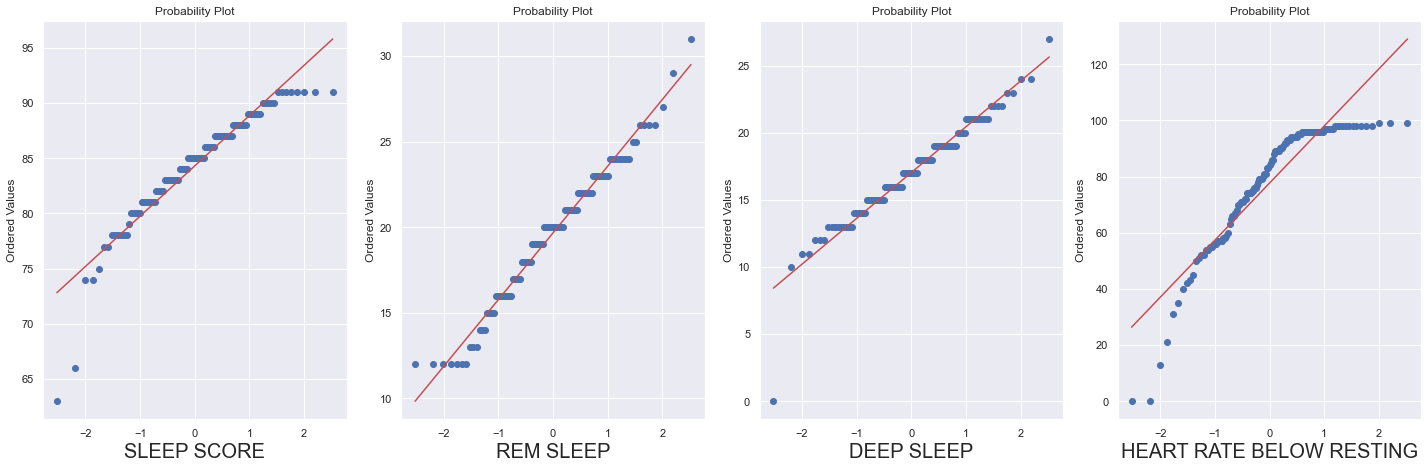

In [51]:
plt.figure(figsize=(20,25),facecolor='white')
a=1
for i in dfg:
    if(a<=4):
        ax=plt.subplot(4,4,a)
        stats.probplot(dfg[i],dist='norm',plot=pylab)        
        plt.xlabel(i,fontsize=20)
    a=a+1
plt.tight_layout()    
        

In [52]:
X=dfg[['HEART RATE BELOW RESTING','REM SLEEP']]
Y=dfg[['SLEEP SCORE']]

In [53]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [54]:
# here i am splitting data into 75-25% for Training and Testing.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=900)

In [67]:
# Here,i am fitting my trained data in linear Regression.
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# print intercept and coefficients(slope)
print(lm.intercept_)
print(lm.coef_)

[84.31910925]
[[2.57256751 1.98951505]]


In [68]:
# printing Performance matrics
print('R2: ',lm.score(x_test,y_test))

R2:  0.7184682987951002


In [57]:
def adj_r2(x,y):
    r2=lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [69]:
# printing Adusted R2
print('Adjusted R2: ',adj_r2(x_test,y_test))

Adjusted R2:  0.6976140987058483


In [70]:
# checking my independent features after making them scaler
X.skew()

HEART RATE BELOW RESTING   -1.366981
REM SLEEP                  -0.061854
dtype: float64

In [71]:
# predicting values from Test data
y_pred=lm.predict(x_test)

In [72]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

MSE:  8.409977540993035
MAPE:  0.027684762019773497
MAE:  2.23425905061965


###### In Last,I am checking whether my independent features have collinearality.

In [82]:

variables = X_scaled
Vif =pd.DataFrame()
Vif['Vif'] = [vif(variables,i) for i in range(variables.shape[1])]
Vif['Features'] = X.columns

In [83]:
Vif

,Vif,Features
0,1.015083,HEART RATE BELOW RESTING
1,1.015083,REM SLEEP
